In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent
import datetime


In [4]:
data = {
    "Teams": [
        "DELHI CAPITALS WOMEN",
        "MUMBAI INDIANS WOMEN",
        "GUJARAT GIANTS WOMEN",
        "ROYAL CHALLENGERS BENGALURU WOMEN",
        "UP WARRIORZ WOMEN"
    ],
    "M": [8, 8, 8, 8, 8],
    "W": [5, 5, 4, 3, 3],
    "L": [3, 3, 4, 5, 5],
    "T": [0, 0, 0, 0, 0],
    "N/R": [0, 0, 0, 0, 0],
    "PT": [10, 10, 8, 6, 6],
    "NRR": [0.396, 0.192, 0.228, -0.196, -0.624]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                               Teams  M  W  L  T  N/R  PT    NRR
0               DELHI CAPITALS WOMEN  8  5  3  0    0  10  0.396
1               MUMBAI INDIANS WOMEN  8  5  3  0    0  10  0.192
2               GUJARAT GIANTS WOMEN  8  4  4  0    0   8  0.228
3  ROYAL CHALLENGERS BENGALURU WOMEN  8  3  5  0    0   6 -0.196
4                  UP WARRIORZ WOMEN  8  3  5  0    0   6 -0.624


In [7]:
df.loc[:,'Rk']=np.arange(1,6)

In [8]:
df=df[['Rk','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [ ]:
df

,Rk,Badge,Teams,M,W,L,T,N/R,PT,NRR
0,1,C://Users//user//Desktop//Github//Projects//Cr...,Delhi Capitals,8,5,3,0,0,10,0.396
1,2,C://Users//user//Desktop//Github//Projects//Cr...,Mumbai Indians,8,5,3,0,0,10,0.192
2,3,C://Users//user//Desktop//Github//Projects//Cr...,Gujarat Giants,8,4,4,0,0,8,0.228
3,4,C://Users//user//Desktop//Github//Projects//Cr...,Royal Challengers Bengaluru,8,3,5,0,0,6,-0.196
4,5,C://Users//user//Desktop//Github//Projects//Cr...,UP Warriorz,8,3,5,0,0,6,-0.624


In [ ]:
bg_color="#ffffff"
text_color="#000000"

plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Bebas Neue'
plt.rcParams['font.size']=40

In [10]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':27},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

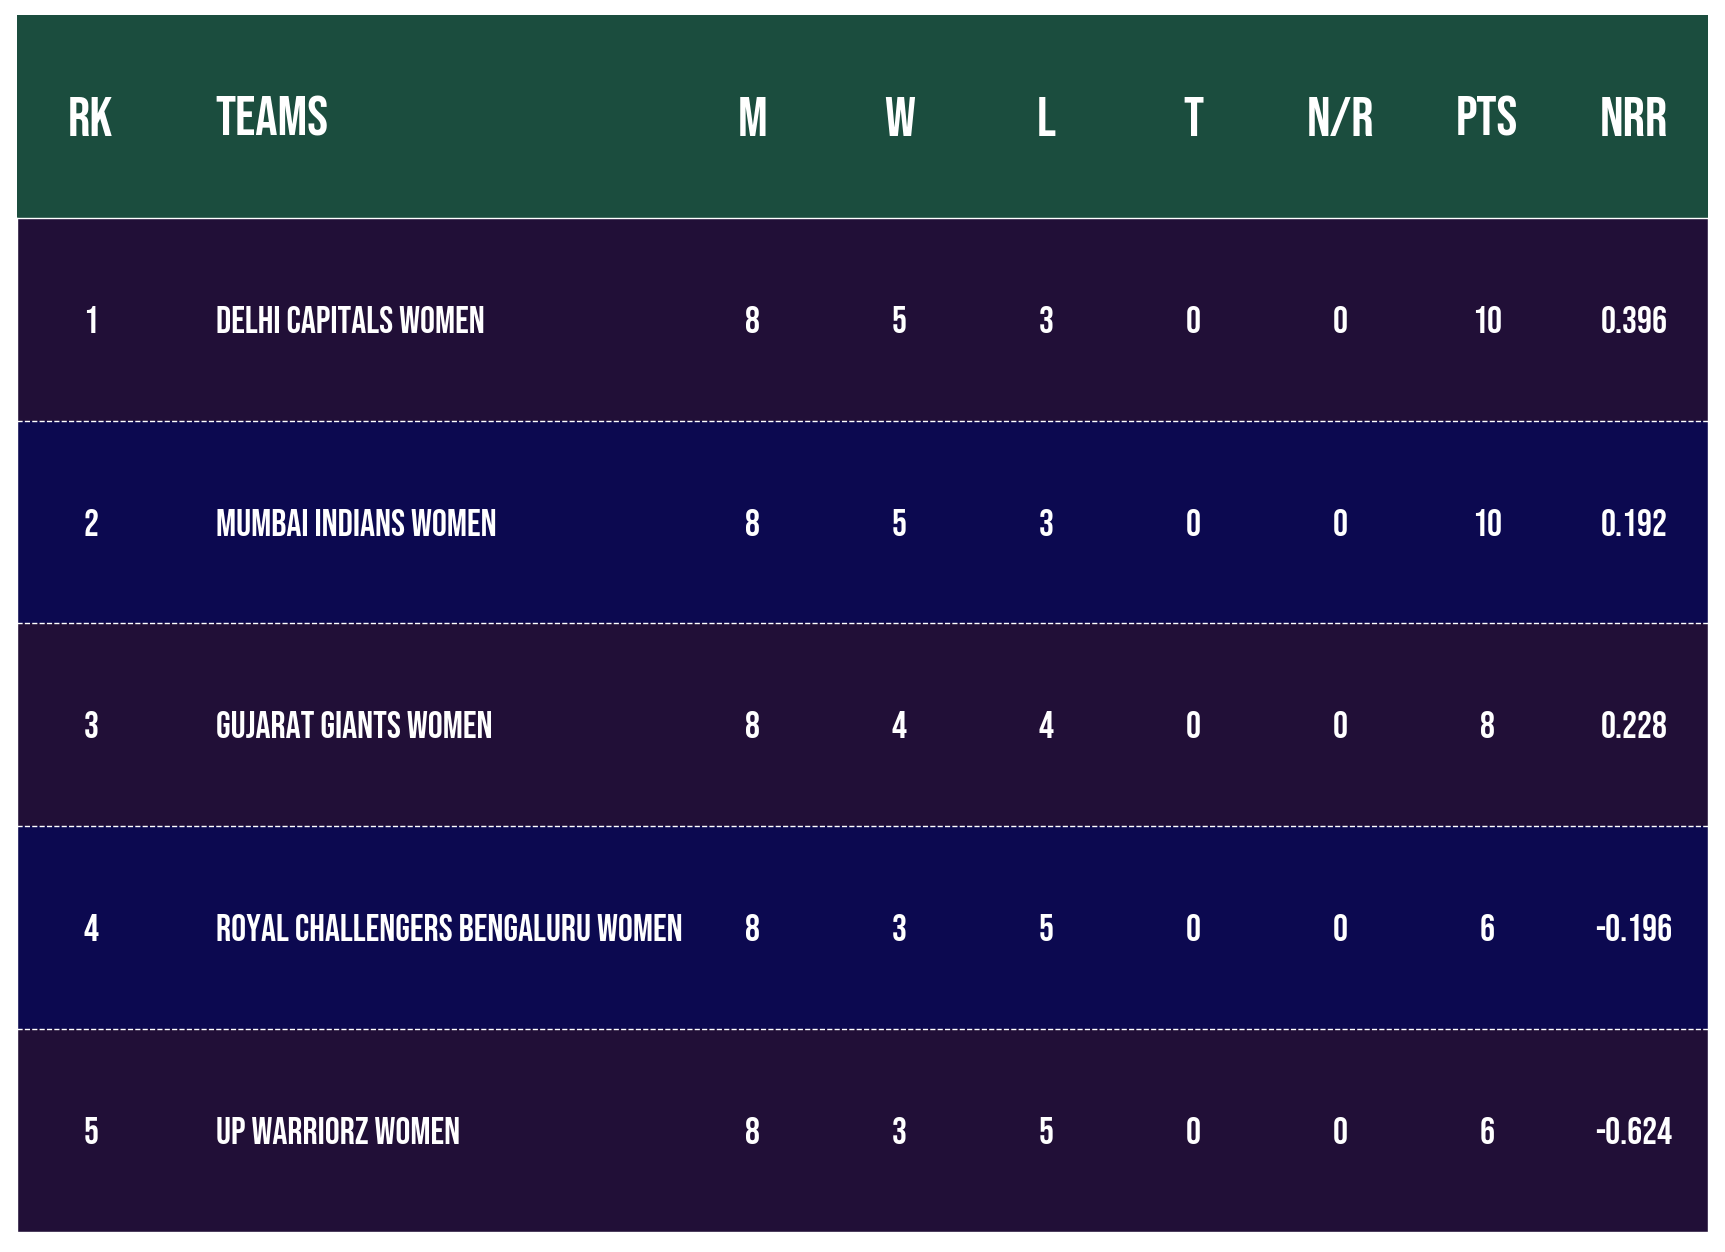

In [13]:
fig, ax = plt.subplots(figsize=(22, 16))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#1B4D3E')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)


for x in range(5):
    if x%2==0:
        table.rows[x].set_facecolor("#210F37")
        table.rows[x].set_fontcolor("#ffffff")
    else:
        table.rows[x].set_facecolor("#0C0950")
        table.rows[x].set_fontcolor("#ffffff")



cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(3.26,4.87,'@copyright',color="white",fontsize=25,alpha=0.5)
# ax.set_title("WPL 2025",pad=20,fontdict={
#     'fontsize':100
# })

plt.show()


In [14]:
date=datetime.datetime.now().strftime("%m_%d_%Y_%H:%M:%S")
fig.savefig(
    f"wpl_1.png",
    # facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)